### 1. Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg". As a feature vector use RGB-representation of each pixel from the image. Refer slide no-24 from MOGandEM.pdf (4th lecture)

1. Initialization: pick K arbitrary centroids (cluster means)
2. Assign each sample to the closest centroid.
3. Adjust the centroids to be the means of the samples assigned to them.
4. Go to step 2 (until no change)

In [3]:
#Headers
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
import sys
import os
from IPython.display import Image
import itertools
from sklearn import mixture
from scipy import linalg
import matplotlib
import imageio as io
import warnings
warnings.filterwarnings('ignore')
import timeit
import random
#Include your other headers here

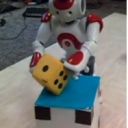

In [4]:
Image(filename='NAORelease.jpg')

K-means Clustering


Lossy conversion from float64 to uint8. Range [3.1159737417943107, 254.6953125]. Convert image to uint8 prior to saving to suppress this warning.


Time taken: 10.047662591999995


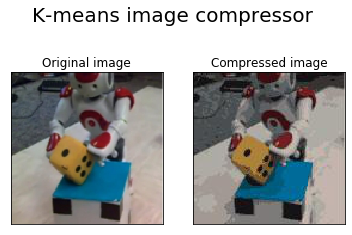

Original image size before running K Means algorithm: 13.98828125KB
Compressed image size after running K Means algorithm: 3.873046875KB


In [5]:
#Manual Implementation of k-means algorithm
def sampleClosestCentroid(X,c):
    #Function to assign each sample to the closest centroids
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

def display_image(org,com):
    #Function to plot compressed image and original image
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.suptitle('K-means image compressor', fontsize=20)
    ax2.set_title('Compressed image')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(com)

    ax1.set_title('Original image')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(org)
    plt.subplots_adjust(top=0.85)
    plt.show()

def calculate_centroids(X,idx,K):
    #Function to calculate the centroids
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

def kMeansClustering(X,initial_centroids,max_iters):
    #Function to perform k means for given iterations
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = sampleClosestCentroid(X,centroids)
        centroids = calculate_centroids(X,idx,K)
    return centroids,idx

def compressImage(image,k, max_iters, r, c):
    #Function to compress the image and display
    initial_centroids = random.sample(list(image),k)
    centroids,idx = kMeansClustering(image,initial_centroids,max_iters)
    idx = sampleClosestCentroid(image,centroids)
    reconstructed_image = centroids[idx]
    reconstructed_image = np.reshape(reconstructed_image, (r, c, 3))
    
    return reconstructed_image

def compare_image_sizes(original,compressed):
    original_image_info = os.stat(original)
    print("Original image size before running K Means algorithm: {0}KB".format(original_image_info.st_size/1024))
    compressed_image_info = os.stat(compressed)
    print("Compressed image size after running K Means algorithm: {0}KB".format(compressed_image_info.st_size/1024))


if __name__ == '__main__': 
    
    print("K-means Clustering")
    #Assign parameters
    #Number of clusters 
    K = 16
    #maximum number of iterations.
    max_iters = 50
    #Read image
    image1 = io.imread('NAORelease.jpg')
    rows = image1.shape[0]
    cols = image1.shape[1]
    #Flatten the image
    image = image1.reshape(rows*cols,3)
    start_manual = timeit.default_timer()
    compressed_image = compressImage(image,K,max_iters,rows,cols)
    stop_manual = timeit.default_timer()
    time_manual = stop_manual - start_manual
    print('Time taken:', time_manual)
    io.imsave('CompressedNAO.jpg',compressed_image)
    image_after_compression = io.imread('CompressedNAO.jpg')
    display_image(image1,image_after_compression)
    compare_image_sizes('NAORelease.jpg','CompressedNAO.jpg')
    

### 2. What are the parameters you played around what is your inference? Hint:- See which are the changeable ones- Hyperparameters

**Parameters that can be changed**<br>
1) Number of clusters - The size of compressed image decreases as K decreases. <br>

2) Number of iterations - As number of iteration increases, execution time increases.<br>

3) Number of initial cluster centroids - Used to pick most converging value which is said to be a best fit. Increasing this value scans the entire image. <br>

4) Image Dimensions: Execution time increases as the image dimensions increases. Higher ‘k’ will produce better quality of compressed image but will take longer to execute.

### 3. Compare your implementation with the existing k-mean algorithm given in sklearn. e.g running time

Time used by K-Means sklearn: 1.216540536999986
Time used by manual K-Means method: 10.047662591999995


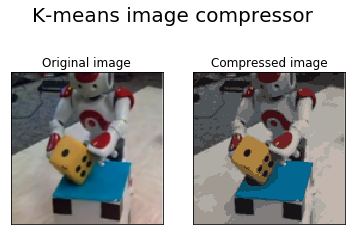

Original image size before running K Means algorithm: 13.98828125KB
Compressed image size after running K Means algorithm: 6.02734375KB


In [7]:
start_sk = timeit.default_timer()

#Implement kmeans clustering to form clusters
kmeans = KMeans(n_clusters=16, n_init=10,max_iter=50)
kmeans.fit(image)
clusters = kmeans.cluster_centers_[kmeans.labels_]
image_after_compression = np.clip(clusters.astype('uint8'),0,255)

compressed_image = image_after_compression.reshape(rows,cols,3)
stop_sk = timeit.default_timer()

#Save and display output image
io.imsave('compressed_image_NAO.png',compressed_image)

time_sklearn = stop_sk - start_sk
print('Time used by K-Means sklearn:', time_sklearn)
print('Time used by manual K-Means method:', time_manual )
display_image(image1,compressed_image)
compare_image_sizes('NAORelease.jpg','compressed_image_NAO.png')

**Inference** <br> 
 K Means is implemented using sklearn and manual method as above. When both the methods are compared, there are a few observations as listed below <br>
 1. Running time - Sklearn implementaion runs faster than our manual implementation (i.e.)Sklearn took less than a second to execute whereas manual implementaion took more than 5 seconds for the same K value and iterations.
 2. Thus, it is pretty evident that increase in K results in more execution time.
 3. Image size - Manual impementation compressed the original image in more reduced size when sklearn did not. Eg: Original image size is 13.98KB. Sklearn compressed it to approx. 6KB but manual method compressed it to 3.8KB.
 4. The size of the compressed image decreases as K decreases.